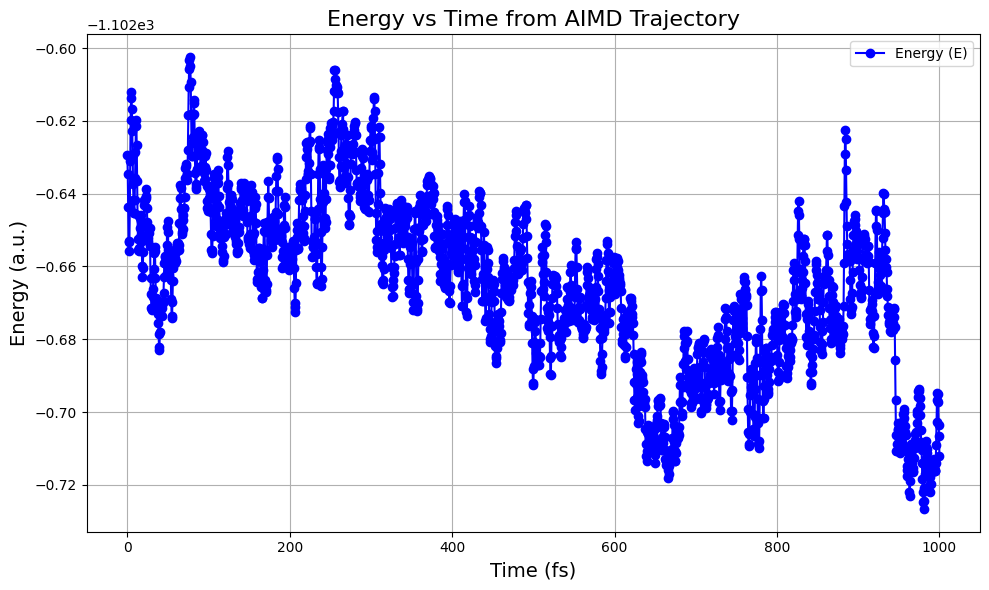

Energy vs Time plot saved to /mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/energy_vs_time_fixed.png


In [6]:
import matplotlib.pyplot as plt

# 设置轨迹文件路径
trajectory_file = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Runs/Water/water_aimd_1ps-pos-1.xyz"

# 初始化时间和能量列表
time = []
energy = []

# 打开文件逐行读取
with open(trajectory_file, 'r') as file:
    for line in file:
        # 检查行中是否包含 "i =" 和 "time =" 和 "E ="
        if "i =" in line and "time =" in line and "E =" in line:
            # 分割行并提取 time 和 E
            parts = line.split(",")
            time_value = float(parts[1].split("=")[1].strip())
            energy_value = float(parts[2].split("=")[1].strip())
            time.append(time_value)
            energy.append(energy_value)

# 绘制能量随时间变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(time, energy, label="Energy (E)", color="blue", marker='o')
plt.xlabel("Time (fs)", fontsize=14)
plt.ylabel("Energy (a.u.)", fontsize=14)
plt.title("Energy vs Time from AIMD Trajectory", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 保存结果为图片
output_image = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/energy_vs_time_fixed.png"
plt.savefig(output_image)
plt.show()

print(f"Energy vs Time plot saved to {output_image}")


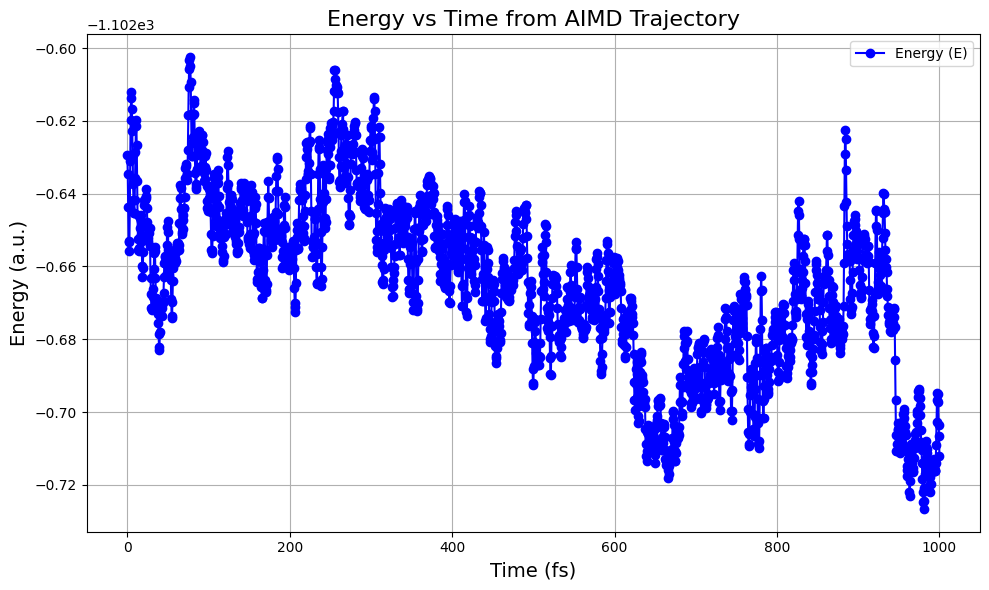

Energy vs Time plot saved to /mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/energy_vs_time_fixed.png


In [5]:
import matplotlib.pyplot as plt

# 设置轨迹文件路径
trajectory_file = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Runs/Water/water_aimd_1ps-pos-1.xyz"

# 初始化时间和能量列表
time = []
energy = []

# 打开文件逐行读取
with open(trajectory_file, 'r') as file:
    for line in file:
        # 检查行中是否包含 "i =" 和 "time =" 和 "E ="
        if "i =" in line and "time =" in line and "E =" in line:
            # 分割行并提取 time 和 E
            parts = line.split(",")
            time_value = float(parts[1].split("=")[1].strip())
            energy_value = float(parts[2].split("=")[1].strip())
            time.append(time_value)
            energy.append(energy_value)

# 绘制能量随时间变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(time, energy, label="Energy (E)", color="blue", marker='o')
plt.xlabel("Time (fs)", fontsize=14)
plt.ylabel("Energy (a.u.)", fontsize=14)
plt.title("Energy vs Time from AIMD Trajectory", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 保存结果为图片
output_image = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/energy_vs_time_fixed.png"
plt.savefig(output_image)
plt.show()

print(f"Energy vs Time plot saved to {output_image}")


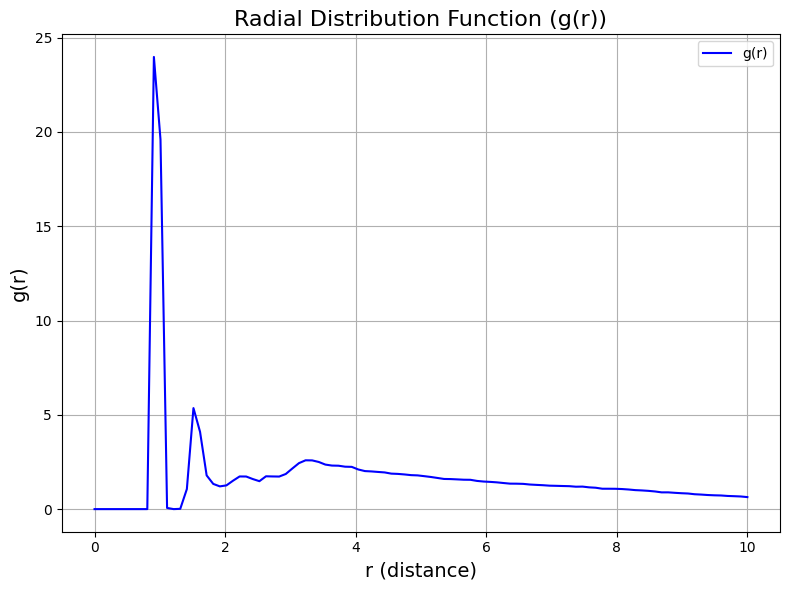

g(r) plot saved to /mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/gr_plot.png


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def read_xyz(file_path):
    """读取 .xyz 文件中的坐标信息"""
    frames = []
    with open(file_path, 'r') as f:
        while True:
            try:
                # 读取每一帧
                num_atoms = int(f.readline().strip())
                f.readline()  # 跳过注释行
                frame = []
                for _ in range(num_atoms):
                    line = f.readline().strip().split()
                    frame.append([float(line[1]), float(line[2]), float(line[3])])
                frames.append(np.array(frame))
            except:
                break
    return frames

def calculate_gr(frames, bin_size=0.1, r_max=10.0):
    """计算径向分布函数"""
    num_bins = int(r_max / bin_size)
    gr = np.zeros(num_bins)
    num_atoms = len(frames[0])
    volume = (2 * r_max) ** 3  # 假设立方体盒子大小
    rho = num_atoms / volume  # 体系密度

    for frame in frames:
        for i in range(num_atoms):
            for j in range(i + 1, num_atoms):
                distance = np.linalg.norm(frame[i] - frame[j])
                if distance < r_max:
                    bin_index = int(distance / bin_size)
                    gr[bin_index] += 2  # 因为是 i-j 和 j-i

    # 归一化 g(r)
    r = np.linspace(0, r_max, num_bins)
    for i in range(num_bins):
        shell_volume = 4 / 3 * np.pi * ((r[i] + bin_size) ** 3 - r[i] ** 3)
        gr[i] /= (len(frames) * num_atoms * rho * shell_volume)
    return r, gr

def plot_gr(r, gr, output_path):
    """绘制 g(r) 曲线"""
    plt.figure(figsize=(8, 6))
    plt.plot(r, gr, label="g(r)", color="blue")
    plt.xlabel("r (distance)", fontsize=14)
    plt.ylabel("g(r)", fontsize=14)
    plt.title("Radial Distribution Function (g(r))", fontsize=16)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f"g(r) plot saved to {output_path}")

# 设置输入路径和参数
xyz_file = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Runs/Water/water_aimd_1ps-pos-1.xyz"
output_plot = "/mnt/d/QM_E/Download/Week12-IntroAIMD/Analysis/gr_plot.png"
bin_size = 0.1
r_max = 10.0

# 执行计算
frames = read_xyz(xyz_file)
r, gr = calculate_gr(frames, bin_size=bin_size, r_max=r_max)
plot_gr(r, gr, output_plot)
